DataFrame con solo valores numéricos:
   fixed_acidity  residual_sugar  alcohol  density
0            9.3             6.4     13.6   1.0005
1           11.2             2.0     14.0   0.9912
2           11.6             0.9      8.2   0.9935
3           12.9             6.6     12.7   1.0002
4           13.9            13.8     10.4   0.9942


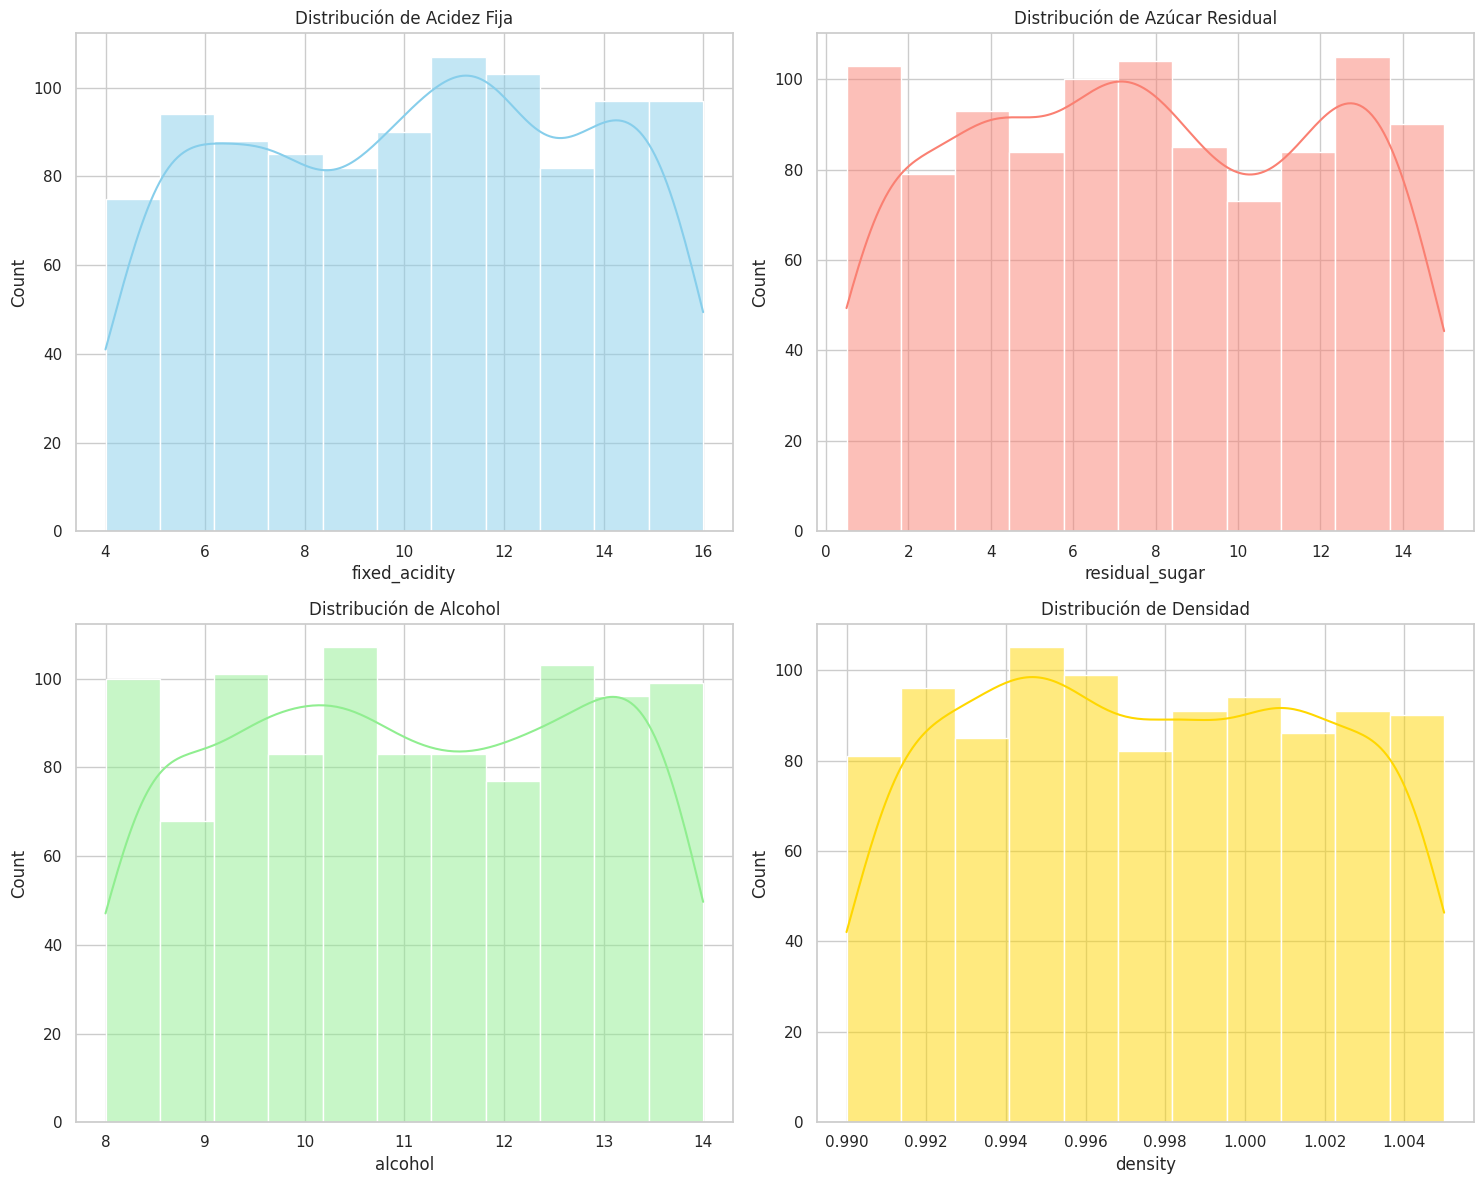

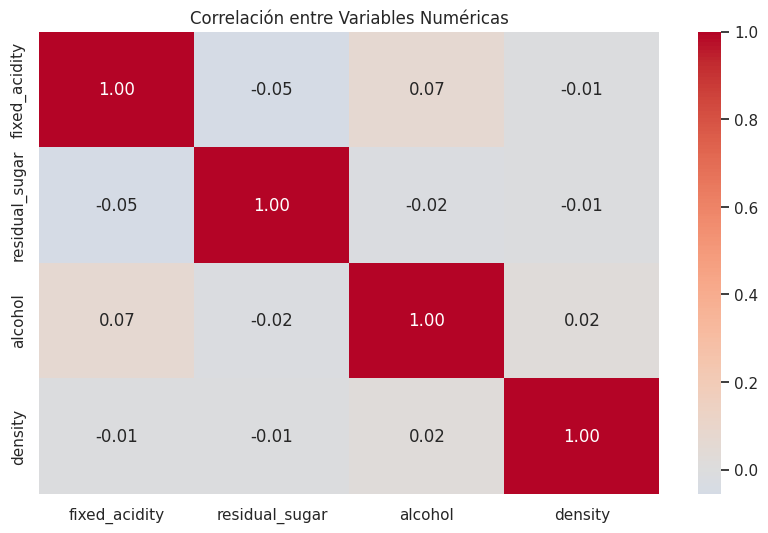

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el dataset
df = pd.read_csv("wine_quality_classification.csv")

# Mantener solo columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

print("DataFrame con solo valores numéricos:")
print(df_numeric.head())

sns.set(style="whitegrid")

# Configurar subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

# 1. Distribución de acidez fija
sns.histplot(df_numeric['fixed_acidity'], kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribución de Acidez Fija")

# 2. Distribución de azúcar residual
sns.histplot(df_numeric['residual_sugar'], kde=True, ax=axs[1], color="salmon")
axs[1].set_title("Distribución de Azúcar Residual")

# 3. Distribución de alcohol
sns.histplot(df_numeric['alcohol'], kde=True, ax=axs[2], color="lightgreen")
axs[2].set_title("Distribución de Alcohol")

# 4. Distribución de densidad
sns.histplot(df_numeric['density'], kde=True, ax=axs[3], color="gold")
axs[3].set_title("Distribución de Densidad")

plt.tight_layout()
plt.show()

# Heatmap de correlaciones solo con variables numéricas
plt.figure(figsize=(10, 6))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlación entre Variables Numéricas")
plt.show()

1. Are there any variables that do not provide information?
Most likely, no—all numerical variables show some degree of variation and are not constants. However, some variables may provide very little unique information due to high correlation with others or very narrow distributions. For example:

If any variable has a very low standard deviation, it might not contribute meaningfully to clustering or prediction.

In the heatmap, if two variables are very highly correlated, one may be redundant.

2. If you had to eliminate variables, which ones would you remove and why?
You should consider removing:

Highly correlated variables (multicollinearity). For example, if density and residual_sugar are very strongly correlated (e.g., > 0.9), you could keep only one.

Weakly varying variables. If a variable shows a tight distribution with little spread, it won't help much in distinguishing samples.

Variables with low or no correlation to others, depending on the modeling goal (e.g., in PCA or regression).

3. Are there any variables with unusual data?
Yes, histogram plots can reveal:

Right-skewed distributions: Variables like residual_sugar or sulphates often have long tails, indicating potential outliers.

Possible outliers: Sharp spikes or isolated values on the edges suggest the presence of extreme data points.

4. If you compare the variables, are they all in similar ranges?
No, the variables are not in similar ranges.

For instance:

alcohol typically ranges from 8 to 14

residual_sugar can range up to 40+

density is around 0.990 to 1.005

5. Do you think this affects the data analysis? Can you find any similar groups? What are these groups?
Yes, different scales heavily affect algorithms like K-means and PCA, which rely on distance. Larger-scale variables dominate the result unless scaling is applied.

As for groups:

Using the correlation heatmap, you might identify clusters of related variables, such as:

residual_sugar, density, and chlorides — possibly related to sweetness or concentration

alcohol, sulphates, and citric_acid — often linked to preservation and fermentation


https://github.com/Uriel1780/semana-tec